<a href="https://colab.research.google.com/github/dalalbinhumaid/mahalanobis-distance/blob/main/mahalanobis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install Libraries
To run the code you need [numpy](https://https://numpy.org/doc/stable/), [scipy](https://https://docs.scipy.org/doc/scipy/) and [matplotlib](https://matplotlib.org/) to be installed. Run the following codeblocks to install and import all the needed dependencies.

In [ ]:
! pip install numpy
! pip install scipy
! pip install matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
from matplotlib.patches import Ellipse
from scipy.spatial import distance

## Configure Styling
Add a dark theme to matplotlib's plots and figure

In [8]:
plt.style.use('https://github.com/dracula/matplotlib/raw/master/dracula.mplstyle')

%matplotlib inline

## Mahalanobis Distance
The formal definition of the Mahalanobis distance is the measure of how similar a point $p$ is to a distribution $Q$, taking  into account the centroid of the distribution which is the mean $\mu$. Thus, a distance 0 indicates the mean and as this distance grows the farther you will get from the mean.
Mahalanobis distance is calculated as:

$$MD = \sqrt{(x - \mu)^T S^{-1} (x - \mu)}$$

Therefore, 1 unit corresponds to 1 standard deviation and is indicative of how far away that point is from the mean of the data.



In [54]:
def mahalanobis(x, mu, S):
  """
    Implementation of formal Mahalanobis distance

    Parameters
    ----------
    x : array-like, shape (n, )
        Vector of the  point to test

    mu : array-like, shape (n, )
        Vector mean of the data

    S : array-lik, shape(n,n)
        Covariance matrix of the data
    Returns
    -------
    squared mahalanobis distance
    """
  r = x - mu
  S = np.linalg.inv(S)
  d = np.sqrt(np.matmul(np.matmul(r.T, S), r))
  return d

### Visualizing Mahalanobis Distance
![](https://drive.google.com/file/d/1UmB7NsEu6YsQiXTBL-0YJM8IRd-uB8aD/view?usp=sharing)



In [66]:
def generate_data(mean=[0, 0], size=20000):
  """
    Generates a multivariate gaussian distributed population

    Parameters
    ----------
    mean : array-like, shape (n, )
        Mean vector of the population

    size : int
        Generated population size

    Returns
    -------
    data of shape (n, size)
    """
  length = len(mean)

  # generate random numbers beween [0, 5)
  A = np.random.rand(length, length) * 5 + 0

  # ensure variance covariance matrix is a positive semi definite
  cov = np.dot(A, A.T)

  return np.random.multivariate_normal(mean, cov, size)

In [67]:
data = generate_data()

In [68]:
x = np.mean(data, axis=0)
x

array([-0.00362743, -0.02142858])

In [69]:
P = np.cov(data, rowvar=False)
P

array([[ 3.8740731 ,  5.96606915],
       [ 5.96606915, 13.47764236]])

In [70]:
v = np.random.multivariate_normal([10, 5], [[1, 0], [0, 100]])
v

array([10.72746157, 27.50485632])

In [71]:
MD_v = mahalanobis(v, x, P)
MD_v

7.61135835268807

In [72]:
distance.mahalanobis(x, v, np.linalg.inv(P))

7.61135835268807

In [73]:
# calculate the Mahalanobis distance for each data point
mahalanobis_dist = [mahalanobis(p, x, P) for p in data]

<ipython-input-101-d76496f449ae>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.set_ticklabels(["{:4.2f}".format(i) for i in v1])


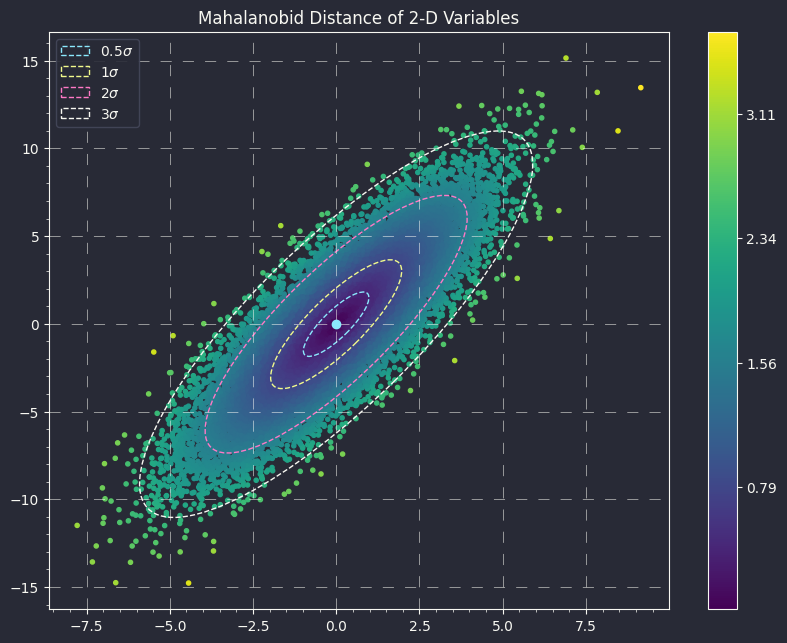

In [101]:
fig, ax = plt.subplots(figsize=(10, 7.5))

ax.minorticks_on()
ax.tick_params(axis="both", which="minor", direction="out", width=0.5, size=2, color="#F8F8F2")


plt.scatter(data[:, 0], data[:, 1], c=mahalanobis_dist, marker='.')
#plt.scatter(v[0], v[1], c=distance.mahalanobis(x, v, np.linalg.inv(P)), cmap='rainbow')
plt.plot(0, 0, 'o')
plt.grid(True, linestyle='-', linewidth=0.5, alpha=0.75, dashes=(16, 16))
v1 = np.linspace(np.min(mahalanobis_dist), np.max(mahalanobis_dist), 7, endpoint=True)
cbar = plt.colorbar()
cbar.set_ticklabels(["{:4.2f}".format(i) for i in v1])
plt.title("Mahalanobid Distance of 2-D Variables")

confidence_ellipse(data[:, 0], data[:, 1], ax, n_std=0.5, label=r'$0.5\sigma$', edgecolor="#8be9fd", linestyle='--')
confidence_ellipse(data[:, 0], data[:, 1], ax, n_std=1, label=r'$1\sigma$', edgecolor="#f1fa8c", linestyle='--')
confidence_ellipse(data[:, 0], data[:, 1], ax, n_std=2, label=r'$2\sigma$', edgecolor="#ff79c6", linestyle='--')
confidence_ellipse(data[:, 0], data[:, 1], ax, n_std=3, label=r'$3\sigma$', edgecolor="#F8F8F2", linestyle='--')

plt.legend()
plt.show()

In [41]:
def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the standard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the standard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)